In [2]:
! pip install -q kaggle

In [3]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashwanthkumarml","key":"a3ded2b119468050f879afae2d91828d"}'}

In [4]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          15517        438  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            540         36  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           1772         61  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [7]:
!kaggle competitions download -c dog-breed-identification

100% 689M/691M [00:18<00:00, 31.4MB/s]
100% 691M/691M [00:18<00:00, 38.4MB/s]


In [8]:
import zipfile

zip_ref = zipfile.ZipFile("/content/dog-breed-identification.zip", "r")
zip_ref.extractall()
zip_ref.close()


In [9]:
import pandas as pd
import os
import shutil

labels=pd.read_csv("labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
breeds=list(labels['breed'].unique())
len(breeds)

120

In [11]:
os.mkdir('new_train')

for i in range(len(labels)):
    if labels['breed'][i] not in os.listdir('new_train'):
        os.mkdir('new_train/'+labels['breed'][i])
    shutil.move('train/'+labels['id'][i]+'.jpg', 'new_train/'+labels['breed'][i])

In [12]:
import os
import shutil
import pandas as pd
import numpy as np

# Change the current working directory to the new_train directory
os.chdir('new_train')

# split data into train(80%), val(20%)
for i in ['train','val']:
    os.mkdir(i)

for i in breeds:
    os.mkdir('train/'+i)
    os.mkdir('val/'+i)
    breed_i=os.listdir(i)
    a=list(range(len(breed_i)))
    np.random.shuffle(a)
    idx = round(len(breed_i)*0.8)
    train=list(pd.Series(breed_i)[a[:idx]])
    val=list(pd.Series(breed_i)[a[idx:]])
    for t in train:
        shutil.move(i+'/'+t, 'train/'+i)
    for v in val:
        shutil.move(i+'/'+v, 'val/'+i)


In [13]:
import os
import shutil

def delete_empty_dirs(path):
    """Delete all empty directories under the specified path."""
    if not os.path.isdir(path):
        return

    # Iterate over the subdirectories in the path
    for dir_name in os.listdir(path):
        full_dir_name = os.path.join(path, dir_name)
        if os.path.isdir(full_dir_name):
            delete_empty_dirs(full_dir_name)

    # If the directory is empty, delete it
    if not os.listdir(path):
        shutil.rmtree(path)

base_dir = '/content/new_train'
delete_empty_dirs(base_dir)

base_dir = '/content/new_train/train'
delete_empty_dirs(base_dir)

In [14]:
!ls /content/new_train/train

affenpinscher			italian_greyhound
afghan_hound			japanese_spaniel
african_hunting_dog		keeshond
airedale			kelpie
american_staffordshire_terrier	kerry_blue_terrier
appenzeller			komondor
australian_terrier		kuvasz
basenji				labrador_retriever
basset				lakeland_terrier
beagle				leonberg
bedlington_terrier		lhasa
bernese_mountain_dog		malamute
black-and-tan_coonhound		malinois
blenheim_spaniel		maltese_dog
bloodhound			mexican_hairless
bluetick			miniature_pinscher
border_collie			miniature_poodle
border_terrier			miniature_schnauzer
borzoi				newfoundland
boston_bull			norfolk_terrier
bouvier_des_flandres		norwegian_elkhound
boxer				norwich_terrier
brabancon_griffon		old_english_sheepdog
briard				otterhound
brittany_spaniel		papillon
bull_mastiff			pekinese
cairn				pembroke
cardigan			pomeranian
chesapeake_bay_retriever	pug
chihuahua			redbone
chow				rhodesian_ridgeback
clumber				rottweiler
cocker_spaniel			saint_bernard
collie				saluki
curly-coated_retriever		samoyed
dandie_di

In [15]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/new_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/new_train'.
There are 120 directories and 0 images in '/content/new_train/train'.
There are 0 directories and 54 images in '/content/new_train/train/golden_retriever'.
There are 0 directories and 76 images in '/content/new_train/train/siberian_husky'.
There are 0 directories and 61 images in '/content/new_train/train/dhole'.
There are 0 directories and 74 images in '/content/new_train/train/italian_greyhound'.
There are 0 directories and 62 images in '/content/new_train/train/norwich_terrier'.
There are 0 directories and 94 images in '/content/new_train/train/maltese_dog'.
There are 0 directories and 82 images in '/content/new_train/train/blenheim_spaniel'.
There are 0 directories and 53 images in '/content/new_train/train/eskimo_dog'.
There are 0 directories and 57 images in '/content/new_train/train/kuvasz'.
There are 0 directories and 65 images in '/content/new_train/train/keeshond'.
There are 0 directories and 68 images in '/content

In [16]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/new_train/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [18]:
train_dir="/content/new_train/train"
test_dir="/content/new_train/val"

Image shape: (248, 175, 3)


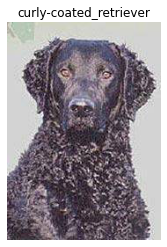

In [19]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8185 images belonging to 120 classes.
Found 2037 images belonging to 120 classes.


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(120, activation='softmax') 
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
# Fit the model
history_1 = model_1.fit(train_data,  
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
256/256 [==============================] - 52s 171ms/step - loss: 4.7990 - accuracy: 0.0121 - val_loss: 4.7848 - val_accuracy: 0.0157
Epoch 2/5
256/256 [==============================] - 41s 159ms/step - loss: 4.6887 - accuracy: 0.0326 - val_loss: 4.6402 - val_accuracy: 0.0216
Epoch 3/5
256/256 [==============================] - 41s 160ms/step - loss: 3.0813 - accuracy: 0.3249 - val_loss: 5.9736 - val_accuracy: 0.0403
Epoch 4/5
256/256 [==============================] - 42s 165ms/step - loss: 0.5552 - accuracy: 0.8786 - val_loss: 14.9314 - val_accuracy: 0.0378
Epoch 5/5
256/256 [==============================] - 42s 163ms/step - loss: 0.0784 - accuracy: 0.9873 - val_loss: 21.1156 - val_accuracy: 0.0398


In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [24]:
model_1.evaluate(test_data)

64/64 [==============================] - 8s 121ms/step - loss: 21.1156 - accuracy: 0.0398


[21.115564346313477, 0.03976435959339142]

In [25]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

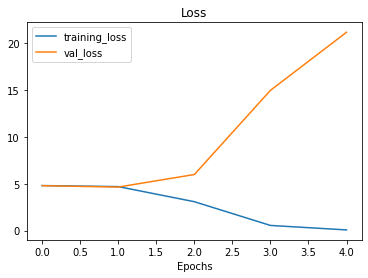

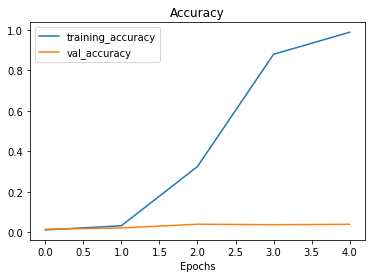

In [26]:
plot_loss_curves(history_1)

In [27]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(120, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
256/256 [==============================] - 40s 154ms/step - loss: 4.7826 - accuracy: 0.0197 - val_loss: 4.6706 - val_accuracy: 0.0250
Epoch 2/5
256/256 [==============================] - 44s 171ms/step - loss: 3.5675 - accuracy: 0.2348 - val_loss: 5.1093 - val_accuracy: 0.0329
Epoch 3/5
256/256 [==============================] - 41s 159ms/step - loss: 1.1437 - accuracy: 0.7575 - val_loss: 7.2744 - val_accuracy: 0.0383
Epoch 4/5
256/256 [==============================] - 39s 151ms/step - loss: 0.2198 - accuracy: 0.9633 - val_loss: 10.0399 - val_accuracy: 0.0353
Epoch 5/5
256/256 [==============================] - 39s 151ms/step - loss: 0.0505 - accuracy: 0.9945 - val_loss: 11.7644 - val_accuracy: 0.0329


In [28]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 120)              

In [29]:
model_2.evaluate(test_data)

64/64 [==============================] - 8s 117ms/step - loss: 11.7644 - accuracy: 0.0329


[11.76439094543457, 0.03289150819182396]

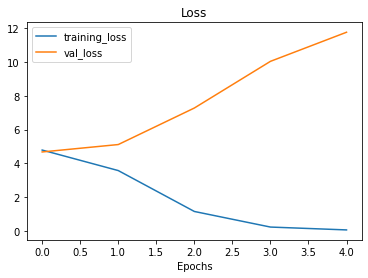

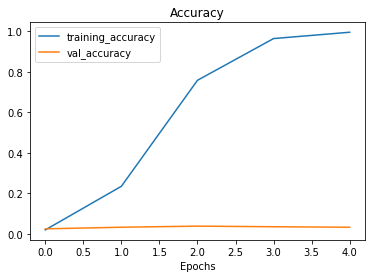

In [30]:
plot_loss_curves(history_2)

In [31]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)
     

In [32]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 8185 images belonging to 120 classes.
Non-augmented training images:
Found 8185 images belonging to 120 classes.
Unchanged test images:
Found 2037 images belonging to 120 classes.


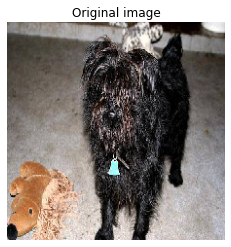

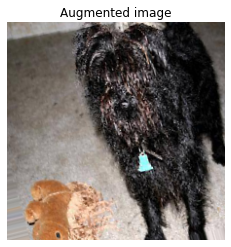

In [33]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
     

# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);
     

In [39]:
from tensorflow.keras.layers import Dropout
model_3= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.7),
    Dense(120, activation='softmax')
])

# Compile the model
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))    

Epoch 1/5
256/256 [==============================] - 115s 447ms/step - loss: 4.9869 - accuracy: 0.0024 - val_loss: 4.7871 - val_accuracy: 0.0108
Epoch 2/5
256/256 [==============================] - 116s 452ms/step - loss: 4.7912 - accuracy: 0.0083 - val_loss: 4.7865 - val_accuracy: 0.0108
Epoch 3/5
256/256 [==============================] - 114s 444ms/step - loss: 4.7908 - accuracy: 0.0045 - val_loss: 4.7860 - val_accuracy: 0.0123
Epoch 4/5
256/256 [==============================] - 114s 445ms/step - loss: 4.7901 - accuracy: 0.0039 - val_loss: 4.7854 - val_accuracy: 0.0123
Epoch 5/5
256/256 [==============================] - 114s 444ms/step - loss: 4.7897 - accuracy: 0.0051 - val_loss: 4.7850 - val_accuracy: 0.0123


In [40]:
model_3.evaluate(test_data)

64/64 [==============================] - 10s 150ms/step - loss: 4.7850 - accuracy: 0.0123


[4.784965515136719, 0.012272950261831284]

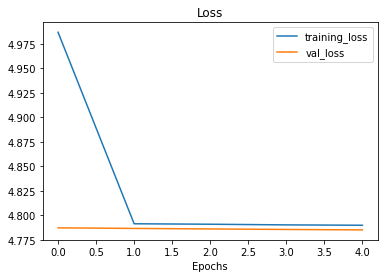

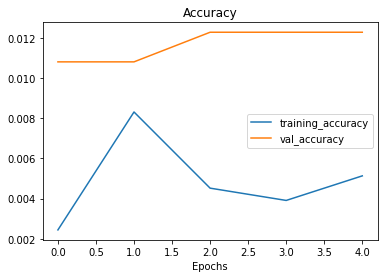

In [41]:
plot_loss_curves(history_3)

In [42]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [43]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [44]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224)+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [45]:
# Create model
resnet_model = create_model(resnet_url, num_classes=120)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [47]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  )

Epoch 1/10
256/256 [==============================] - 44s 173ms/step - loss: 0.7580 - accuracy: 0.7636 - val_loss: 1.4283 - val_accuracy: 0.6456
Epoch 2/10
256/256 [==============================] - 47s 183ms/step - loss: 0.6636 - accuracy: 0.7859 - val_loss: 1.4982 - val_accuracy: 0.6480
Epoch 3/10
256/256 [==============================] - 44s 172ms/step - loss: 0.5561 - accuracy: 0.8266 - val_loss: 1.6519 - val_accuracy: 0.6254
Epoch 4/10
256/256 [==============================] - 44s 173ms/step - loss: 0.4770 - accuracy: 0.8481 - val_loss: 1.4617 - val_accuracy: 0.6514
Epoch 5/10
256/256 [==============================] - 45s 176ms/step - loss: 0.4062 - accuracy: 0.8635 - val_loss: 1.4265 - val_accuracy: 0.6613
Epoch 6/10
256/256 [==============================] - 46s 180ms/step - loss: 0.3424 - accuracy: 0.8871 - val_loss: 1.3975 - val_accuracy: 0.6784
Epoch 7/10
256/256 [==============================] - 45s 174ms/step - loss: 0.3187 - accuracy: 0.9003 - val_loss: 1.6176 - val_ac

In [48]:
resnet_model.evaluate(test_data)

64/64 [==============================] - 9s 138ms/step - loss: 1.4557 - accuracy: 0.6838


[1.4557393789291382, 0.6838487982749939]

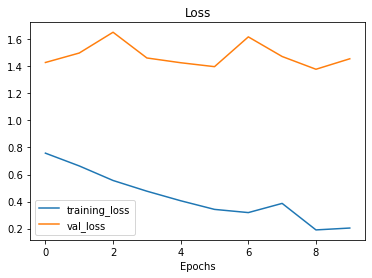

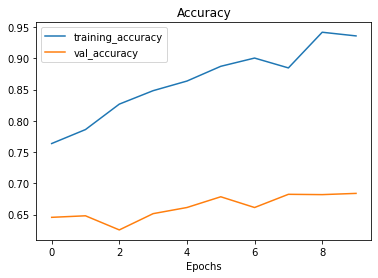

In [49]:
plot_loss_curves(resnet_history)

In [50]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 120)               245880    
                                                                 
Total params: 23,810,680
Trainable params: 245,880
Non-trainable params: 23,564,800
_________________________________________________________________


In [51]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=120)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              )

Epoch 1/5
256/256 [==============================] - 52s 175ms/step - loss: 4.1008 - accuracy: 0.1818 - val_loss: 1.8989 - val_accuracy: 0.6534
Epoch 2/5
256/256 [==============================] - 42s 165ms/step - loss: 1.5483 - accuracy: 0.6353 - val_loss: 1.0557 - val_accuracy: 0.7541
Epoch 3/5
256/256 [==============================] - 44s 173ms/step - loss: 0.9054 - accuracy: 0.7688 - val_loss: 0.8281 - val_accuracy: 0.7835
Epoch 4/5
256/256 [==============================] - 42s 166ms/step - loss: 0.6606 - accuracy: 0.8263 - val_loss: 0.7126 - val_accuracy: 0.8115
Epoch 5/5
256/256 [==============================] - 43s 169ms/step - loss: 0.5332 - accuracy: 0.8610 - val_loss: 0.6498 - val_accuracy: 0.8233


In [52]:
efficientnet_model.evaluate(test_data)

64/64 [==============================] - 9s 133ms/step - loss: 0.6498 - accuracy: 0.8233


[0.649771511554718, 0.8232694864273071]

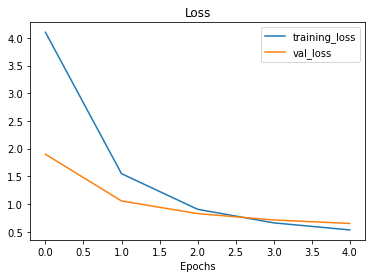

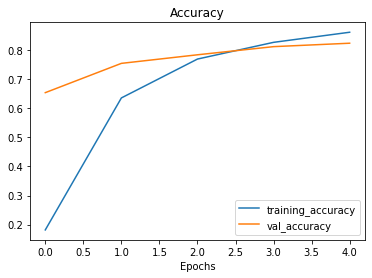

In [53]:
plot_loss_curves(efficientnet_history)

In [54]:
efficientnet_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 4,203,284
Trainable params: 153,720
Non-trainable params: 4,049,564
_________________________________________________________________


In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [58]:
# Create model
efficientnet_model_augmented = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=120)

# Compile EfficientNet model
efficientnet_model_augmented.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_augmented_history = efficientnet_model.fit(train_data_augmented, 
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data)
                                             )

Epoch 1/5
256/256 [==============================] - 120s 470ms/step - loss: 0.7476 - accuracy: 0.7785 - val_loss: 0.6427 - val_accuracy: 0.8223
Epoch 2/5
256/256 [==============================] - 118s 459ms/step - loss: 0.6578 - accuracy: 0.8064 - val_loss: 0.6273 - val_accuracy: 0.8213
Epoch 3/5
256/256 [==============================] - 115s 448ms/step - loss: 0.5620 - accuracy: 0.8319 - val_loss: 0.5968 - val_accuracy: 0.8189
Epoch 4/5
256/256 [==============================] - 114s 444ms/step - loss: 0.5066 - accuracy: 0.8520 - val_loss: 0.6009 - val_accuracy: 0.8144
Epoch 5/5
256/256 [==============================] - 116s 451ms/step - loss: 0.4554 - accuracy: 0.8650 - val_loss: 0.5924 - val_accuracy: 0.8189


In [59]:
efficientnet_model_augmented.evaluate(test_data)

64/64 [==============================] - 10s 134ms/step - loss: 4.8675 - accuracy: 0.0137


[4.867465019226074, 0.013745704665780067]

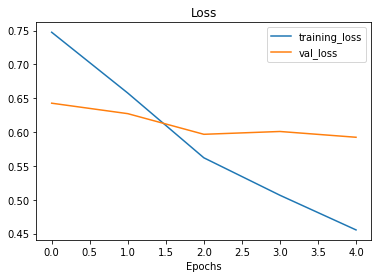

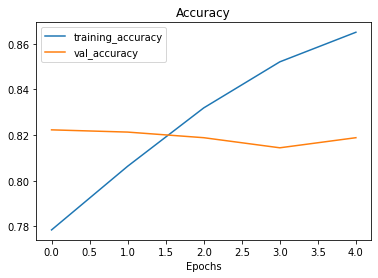

In [60]:
plot_loss_curves(efficientnet_augmented_history)

In [61]:
pred_probs = efficientnet_model.predict(test_data, verbose=1)

64/64 [==============================] - 9s 131ms/step


In [62]:
len(pred_probs)

2037

In [63]:
pred_probs.shape

(2037, 120)

In [64]:
pred_probs[:10]

array([[1.6082657e-05, 5.2048435e-04, 2.4486993e-05, ..., 4.3484029e-06,
        5.0823706e-05, 9.3990820e-06],
       [8.0869370e-08, 2.9784975e-05, 1.6664890e-05, ..., 6.9517509e-06,
        4.9034929e-06, 5.5932907e-07],
       [3.6666726e-05, 9.7079406e-04, 9.6962958e-06, ..., 1.7371673e-04,
        1.4856781e-06, 2.9531475e-06],
       ...,
       [2.1095912e-05, 5.6278168e-06, 1.2227491e-04, ..., 1.2178410e-05,
        3.2517055e-06, 7.3240089e-06],
       [3.4894356e-06, 1.8327686e-06, 3.4929478e-06, ..., 7.5613139e-06,
        1.2105881e-02, 8.7161548e-05],
       [5.6480253e-06, 5.1653951e-01, 3.8029011e-05, ..., 4.4221547e-03,
        7.0645375e-04, 1.4259100e-05]], dtype=float32)

In [65]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 120
What prediction probability sample 0 looks like:
 [1.6082657e-05 5.2048435e-04 2.4486993e-05 2.4893429e-06 1.5853926e-05
 1.4129993e-06 1.2751587e-04 1.5895528e-05 2.4785507e-03 1.0944089e-03
 1.0268564e-05 1.0836529e-04 3.3425091e-05 8.9134443e-01 2.6569975e-04
 1.0343473e-04 2.1037640e-05 6.2683075e-06 1.7010079e-05 4.7797271e-06
 3.1992844e-05 4.6750272e-05 6.1281094e-06 4.2880216e-05 1.4815339e-02
 3.7580339e-05 1.4383440e-05 1.1172859e-05 1.0204071e-06 1.6303144e-05
 7.9878257e-05 2.2064801e-03 1.0612772e-02 4.2606527e-05 1.4554238e-05
 6.4937405e-05 2.9446612e-05 1.0668854e-05 6.0316603e-07 5.9567014e-04
 1.9423935e-03 6.4419647e-04 7.0852620e-05 8.0639638e-06 1.4950166e-05
 6.5494976e-05 1.7462620e-05 3.5558458e-06 1.1535386e-05 2.6651440e-04
 2.6173392e-04 1.4143226e-05 3.1712283e-05 7.6355391e-05 7.5539916e-05
 3.5631085e-05 4.6138879e-04 1.5932243e-05 1.0097230e-04 6.6498178e-06
 9.4526486e-06 4.9347173e-02 7.3910364e-06 9.

In [66]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([ 13,  15,  97,  62, 109, 118,  42,  36,   3,   1])

In [67]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 22ms/step


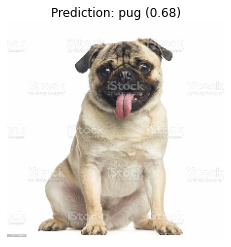

In [73]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class and confidence
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
    confidence = pred.max() # get the confidence of the max class
  # Plot the image and predicted class with confidence
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} ({confidence:.2f})")
  plt.axis(False);

pred_and_plot(efficientnet_model,'/content/pug.jpg',class_names)